In [1]:
%matplotlib inline
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import matplotlib.pyplot as plt
# 필요한 라이브러리들을 임포트
import argparse
import sys
import numpy as np
import math
from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf
FLAGS = None

In [2]:
parser = argparse.ArgumentParser()
parser.add_argument('--data_dir', type=str,
                  default='/tmp/tensorflow/mnist/input_data',
                  help='Directory for storing input data')
FLAGS, unparsed = parser.parse_known_args()

In [3]:
FLAGS

Namespace(data_dir='/tmp/tensorflow/mnist/input_data')

In [4]:
unparsed

['-f',
 'C:\\Users\\donghwa\\AppData\\Roaming\\jupyter\\runtime\\kernel-2b1dd5d4-30b2-459a-9098-a2914517faec.json']

In [5]:
# function for printing tensor
def print_tensor(x):
  init = tf.global_variables_initializer()
  with tf.Session() as sess:
    init.run()
    result=x.eval()
    print(result)

def print_place_holder(input, a, b):
  init = tf.global_variables_initializer()
  with tf.Session() as sess:
    init.run()
    result = sess.run(input, feed_dict={x: a, y_: b})
    print(result)

# 숫자를 분류하기 위한 Deep Neural Networks 그래프를 생성한다.
## 인자들(Args):
    - x: (N_examples, 784) 차원을 가진 input tensor, 784 일반적인 MNIST 데이터의 픽셀 개수이다.
## 리턴값들(Returns):
    - tuple (y, keep_prob). y는 (N_examples, 10)형태의 숫자(0-9) tensor이다. 
    - keep_prob는 dropout을 위한 scalar placeholder이다.

In [6]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url='http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/11/Screen-Shot-2015-11-07-at-7.26.20-AM.png')

In [7]:
def deepnn(x):

  # Convolutional Neural Netwokrs(CNNs)를 위한 reshape.
  # 마지막 차원(dimension)은 특징들("features")을 나타낸다.
  #-이 코드에서는 이미지가 grayscale이라 일차원이지만, RGB 이미지라면 3차원, RGBA라면 4차원 이미지 일 것이다.
    x_image = tf.reshape(x, [-1, 28, 28, 1])

  # 첫번째 convolutional layer - 하나의 grayscale 이미지를 32개의 특징들(feature)으로 맵핑(maping)한다.
    W_conv1 = weight_variable([5, 5, 1, 32]) # 5x5x32
    b_conv1 = bias_variable([32])
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)

  # Pooling layer - 2X만큼 downsample한다.
    h_pool1 = max_pool_2x2(h_conv1)

  # 두번째 convolutional layer -- 32개의 특징들(feature)을 64개의 특징들(feature)로 맵핑(maping)한다.
    W_conv2 = weight_variable([5, 5, 32, 64])
    b_conv2 = bias_variable([64])
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)

  # 두번째 pooling layer.
    h_pool2 = max_pool_2x2(h_conv2)

  # Fully Connected Layer 1 -- 2번의 downsampling 이후에, 우리의 28x28 이미지는 7x7x64 특징들(feature map)이 된다.
  # 이를 1024개의 특징들로 맵핑(maping)한다.
    W_fc1 = weight_variable([7 * 7 * 64, 1024])
    b_fc1 = bias_variable([1024])
    
    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

  # Dropout - 모델의 복잡도를 컨트롤한다. 특징들의 co-adaptation을 방지한다.
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

  # 1024개의 특징들(feature)을 10개의 클래스-숫자 0-9-로 맵핑(maping)한다.
    W_fc2 = weight_variable([1024, 10])
    b_fc2 = bias_variable([10])
    
    y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
    
    return y_conv, keep_prob, W_conv1,W_conv2,h_conv1,h_conv2

In [8]:
def conv2d(x, W): # 정사각형 필터 (2차원)
    """conv2d는 full stride를 가진 2d convolution layer를 반환(return)한다."""
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [9]:
def max_pool_2x2(x):
    """max_pool_2x2는 특징들(feature map)을 2X만큼 downsample한다."""
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [10]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url='https://qiita-image-store.s3.amazonaws.com/0/100523/eb1e8fbd-1a71-8e12-16a5-cc6cce9a4def.png')

In [11]:
def weight_variable(shape):
    """weight_variable는 주어진 shape에 대한 weight variable을 생성한다."""
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

In [12]:
def bias_variable(shape):
    """bias_variable 주어진 shape에 대한 bias variable을 생성한다."""
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [13]:
# data를 import한다.
mnist = input_data.read_data_sets(FLAGS.data_dir, one_hot=True)

Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz


In [14]:
# 모델을 생성한다.
x = tf.placeholder(tf.float32, [None, 784])

# loss와 optimizer를 정의한다.
y_ = tf.placeholder(tf.float32, [None, 10])

In [16]:
# Deep Neural Networks 그래프를 생성한다.
y_conv, keep_prob, W_conv1, W_conv2, h_conv1, h_conv2 = deepnn(x)
print(y_conv,keep_prob)

Tensor("add_7:0", shape=(?, 10), dtype=float32) Tensor("Placeholder_3:0", dtype=float32)


In [17]:
# Cross Entropy를 비용함수(loss function)으로 정의하고, AdamOptimizer를 이용해서 비용 함수를 최소화한다.
cross_entropy = tf.reduce_mean(
  tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [18]:
# 정확도를 측정한다.
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [19]:
init=tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(20000):
    batch = mnist.train.next_batch(50)
    # 100 Step마다 training 데이터셋에 대한 정확도를 출력한다.
    if i % 100 == 0:
        train_accuracy = sess.run(accuracy,feed_dict={
            x: batch[0], y_: batch[1], keep_prob: 1.0})
        print('step %d, training accuracy %g' % (i, train_accuracy))
    sess.run(train_step,feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
print('test accuracy %g' % sess.run(accuracy, feed_dict={
        x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.12
step 100, training accuracy 0.68
step 200, training accuracy 0.84
step 300, training accuracy 0.92
step 400, training accuracy 0.94
step 500, training accuracy 1
step 600, training accuracy 0.98
step 700, training accuracy 0.94
step 800, training accuracy 0.94
step 900, training accuracy 0.96
step 1000, training accuracy 0.94
step 1100, training accuracy 0.98
step 1200, training accuracy 0.96
step 1300, training accuracy 0.96
step 1400, training accuracy 0.96
step 1500, training accuracy 0.94
step 1600, training accuracy 0.94
step 1700, training accuracy 0.96
step 1800, training accuracy 0.96
step 1900, training accuracy 0.98
step 2000, training accuracy 1
step 2100, training accuracy 0.98
step 2200, training accuracy 0.96
step 2300, training accuracy 1
step 2400, training accuracy 1
step 2500, training accuracy 1
step 2600, training accuracy 0.98
step 2700, training accuracy 0.96
step 2800, training accuracy 1
step 2900, training accuracy 0.98
step 3000,

In [20]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [21]:
def plot_conv_weights(weights, input_channel=0):
    # Assume weights are TensorFlow ops for 4-dim variables
    # e.g. weights_conv1 or weights_conv2.
    
    # Retrieve the values of the weight-variables from TensorFlow.
    # A feed-dict is not necessary because nothing is calculated.
    w = session.run(weights)

    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Number of filters used in the conv. layer.
    num_filters = w.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            # Get the weights for the i'th filter of the input channel.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = w[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [22]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes = 10

In [23]:
def plot_conv_weights(weights, input_channel=0):
    # Assume weights are TensorFlow ops for 4-dim variables
    # e.g. weights_conv1 or weights_conv2.
    
    # Retrieve the values of the weight-variables from TensorFlow.
    # A feed-dict is not necessary because nothing is calculated.
    w = sess.run(weights)

    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Number of filters used in the conv. layer.
    num_filters = w.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            # Get the weights for the i'th filter of the input channel.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = w[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [24]:
def plot_conv_layer(layer, image):
    # Assume layer is a TensorFlow op that outputs a 4-dim tensor
    # which is the output of a convolutional layer,
    # e.g. layer_conv1 or layer_conv2.

    # Create a feed-dict containing just one image.
    # Note that we don't need to feed y_true because it is
    # not used in this calculation.
    feed_dict = {x: [image]}

    # Calculate and retrieve the output values of the layer
    # when inputting that image.
    values = sess.run(layer, feed_dict=feed_dict)

    # Number of filters used in the conv. layer.
    num_filters = values.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot the output images of all the filters.
    for i, ax in enumerate(axes.flat):
        # Only plot the images for valid filters.
        if i<num_filters:
            # Get the output image of using the i'th filter.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = values[0, :, :, i]

            # Plot image.
            ax.imshow(img, interpolation='nearest', cmap='binary')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [25]:
def plot_image(image):
    plt.imshow(image.reshape(img_shape),
               interpolation='nearest',
               cmap='binary')

    plt.show()

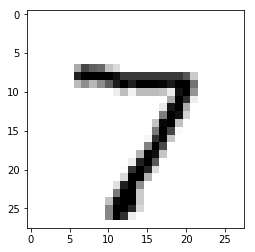

In [26]:
image1 = mnist.test.images[0]
plot_image(image1)

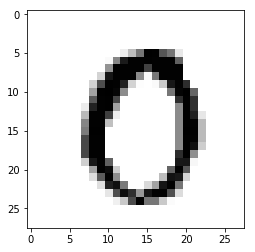

In [27]:
image2 =mnist.test.images[13]
plot_image(image2)

# In convolution layer1

## weight
- 블루: 양의 값
- 음수: 음의 값
- 직관적으로 알아보기 힘듬

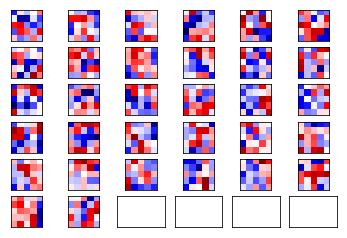

In [28]:
plot_conv_weights(weights=W_conv1) # 32 채널

## 1- Conv-layer

- 14x14로 원래 이미지에서 절반으로 다운 샘플링된 이미지

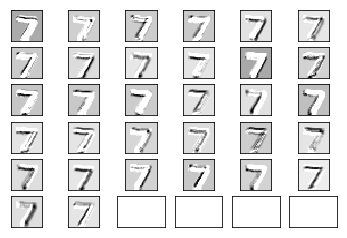

In [29]:
plot_conv_layer(layer=h_conv1, image=image1) # 32 채널

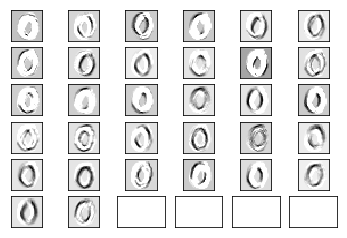

In [33]:
plot_conv_layer(layer=h_conv1, image=image2) # 32 채널

- 밝은 부분이 빛나고, 어두운 부분은 그림자가 졌을뿐 같은 숫자 이미지에 대해서 다양한 입력이미지를 창조하지 못함

# In convolution layer2
## weight
- 블루: 양의 값
- 음수: 음의 값
- 직관적으로 알아보기 힘듬

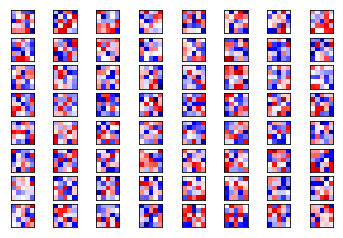

In [30]:
plot_conv_weights(weights=W_conv2, input_channel=0)

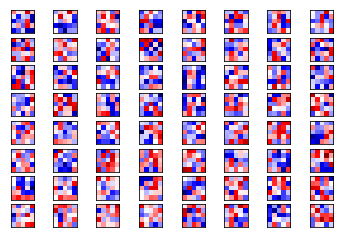

In [31]:
plot_conv_weights(weights=W_conv2, input_channel=3)

## 2-Conv-layer
- 두번째 컨볼루션 레이어에서 이미지의 직선과 패턴들을 추출하였고 지역적인 변동에 덜 민감함

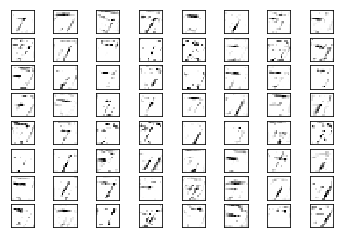

In [34]:
plot_conv_layer(layer=h_conv2, image=image1) 

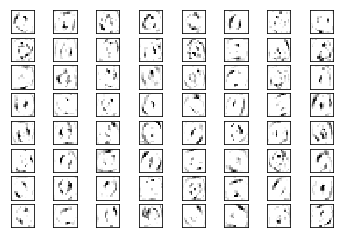

In [32]:
plot_conv_layer(layer=h_conv2, image=image2)